In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [34]:
from google.colab import files
uploaded = files.upload()


Saving delivery.csv to delivery (1).csv


KeyboardInterrupt: ignored

In [35]:
delivery=pd.read_csv('delivery.csv')

In [36]:
delivery

,Unnamed: 0,Invoice Date,Promised Delivery Date
0,634,2008-05-29,5/22/2008
1,641,2008-05-29,5/23/2008
2,656,2008-07-08,6/24/2008
3,759,2008-06-03,6/3/2008
4,761,2008-09-08,9/8/2008
...,...,...,...
286596,296136,2009-12-15,12/11/2009
286597,296137,2009-06-06,6/6/2009
286598,296138,2009-04-30,4/30/2009
286599,296139,2009-04-29,4/29/2009


In [37]:
delivery['Invoice Date']= pd.to_datetime(delivery['Invoice Date'])

In [38]:
delivery.dtypes

Unnamed: 0                         int64
Invoice Date              datetime64[ns]
Promised Delivery Date            object
dtype: object

In [39]:
delivery['Promised Delivery Date'] = delivery['Promised Delivery Date'].str.replace('/','-')

In [40]:
indexNames = delivery[ delivery['Promised Delivery Date'] == '12-31-1005' ].index

In [41]:
delivery.drop(indexNames , inplace=True)

In [42]:
delivery['Promised Delivery Date']= pd.to_datetime(delivery['Promised Delivery Date'])

In [43]:
delivery

,Unnamed: 0,Invoice Date,Promised Delivery Date
0,634,2008-05-29,2008-05-22
1,641,2008-05-29,2008-05-23
2,656,2008-07-08,2008-06-24
3,759,2008-06-03,2008-06-03
4,761,2008-09-08,2008-09-08
...,...,...,...
286596,296136,2009-12-15,2009-12-11
286597,296137,2009-06-06,2009-06-06
286598,296138,2009-04-30,2009-04-30
286599,296139,2009-04-29,2009-04-29


In [44]:
delivery.dtypes

Unnamed: 0                         int64
Invoice Date              datetime64[ns]
Promised Delivery Date    datetime64[ns]
dtype: object

In [45]:
delivery['Difference'] = (delivery['Promised Delivery Date'] - delivery['Invoice Date']).dt.days

In [46]:
delivery

,Unnamed: 0,Invoice Date,Promised Delivery Date,Difference
0,634,2008-05-29,2008-05-22,-7
1,641,2008-05-29,2008-05-23,-6
2,656,2008-07-08,2008-06-24,-14
3,759,2008-06-03,2008-06-03,0
4,761,2008-09-08,2008-09-08,0
...,...,...,...,...
286596,296136,2009-12-15,2009-12-11,-4
286597,296137,2009-06-06,2009-06-06,0
286598,296138,2009-04-30,2009-04-30,0
286599,296139,2009-04-29,2009-04-29,0


In [47]:
delivery['Difference'].mean()

2.3302756454989533

In [48]:
delivery.to_csv('DeliveryInsight.csv')

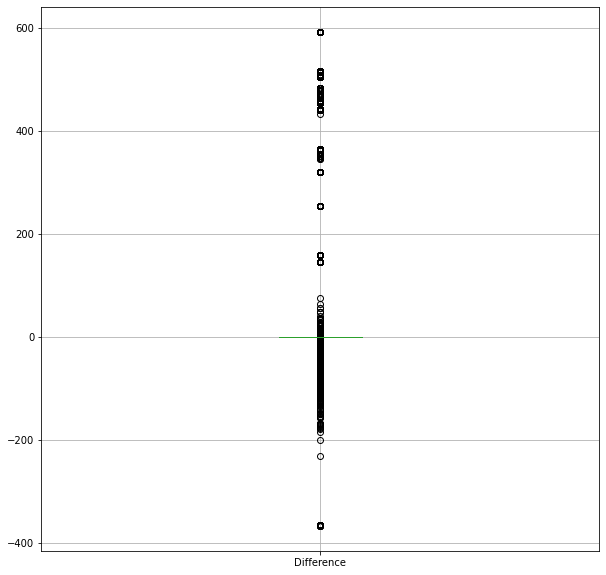

In [51]:
boxplot=delivery.boxplot(column='Difference',figsize=(10, 10))

In [57]:
indexNames_tg=delivery[delivery['Difference']>100].index
delivery.drop(indexNames_tg, inplace=True)

In [55]:
indexNames_tf=delivery[delivery['Difference']<-200].index
delivery.drop(indexNames_tf, inplace=True)

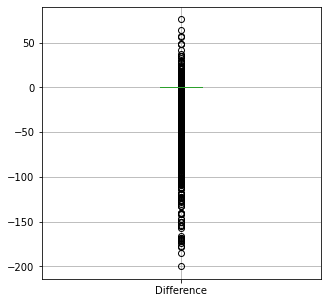

In [60]:
boxplot=delivery.boxplot(column='Difference',figsize=(5, 5))

In [59]:
delivery.to_csv('DeliveryInsightfinal.csv')